<a href="https://colab.research.google.com/github/shri4916/DS-Class/blob/main/11_Python_Basics_Regular_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regular Expressions
A Regular Expressions (**RegEx**) is a special sequence of characters that uses a search pattern to find a string or set of strings.

It can detect the presence or absence of a text by matching with a particular pattern, and also can split a pattern into one or more sub-patterns.

Python provides a re module that supports the use of regex in Python. Its primary function is to offer a search, where it takes a regular expression and a string. Here, it either returns the first match or else none.

It is used in NLP for data cleaning.

In [4]:
import re
s = "Python is easy"
result = re.search(r"easy", s)
print(result)
print(type(result))
print("starts with index :", result.start())
print("Ends with index :", result.end())

#Note: Here r character (r’portal’) stands for raw, not regex.

<re.Match object; span=(10, 14), match='easy'>
<class 're.Match'>
starts with index : 10
Ends with index : 14


#MetaCharacters (Special Sequences)

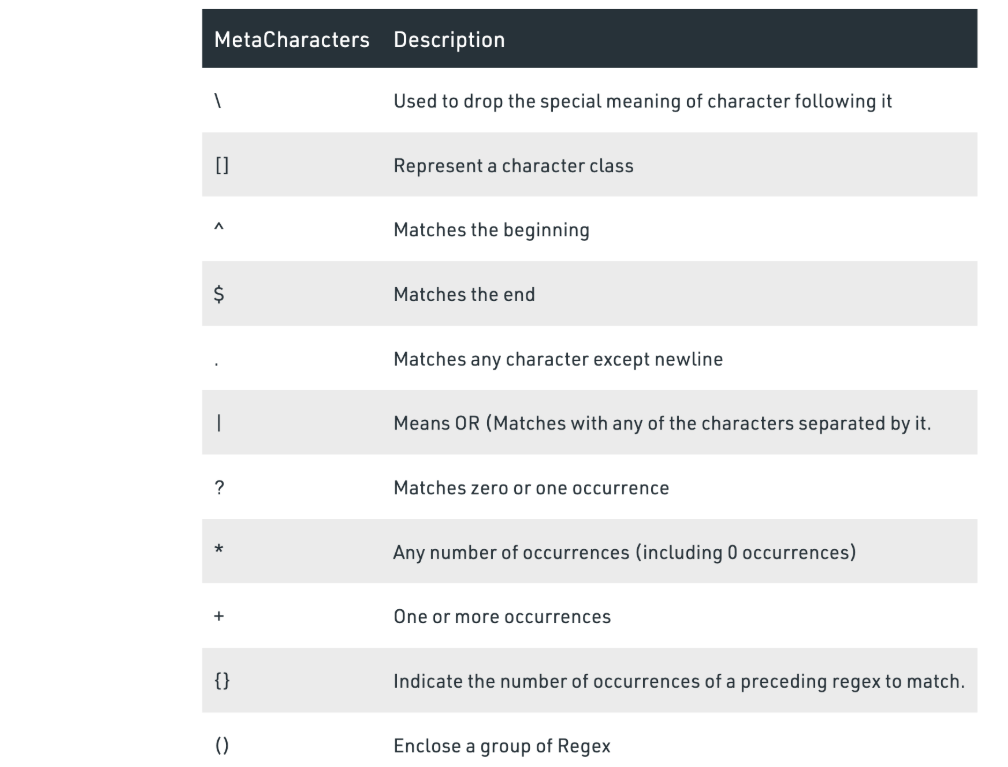

#\ – Backslash
The backslash () makes sure that the character is not treated in a special way. This can be considered a way of escaping metacharacters.

For example, if you want to search for the dot(.) in the string then you will find that dot(.) will be treated as a special character as is one of the metacharacters (as shown in the above table). So for this case, we will use the backslash() just before the dot(.) so that it will lose its specialty. See the below example for a better understanding.

In [7]:
s = "s.data coading"

# without using \
a = re.search(r".", s)
print(a) # when it does not find the exact location it retuen the first index of string (0, 1)

# with \
a = re.search(r"\.", s)
print(a) # now it shall display the exact ans

<re.Match object; span=(0, 1), match='s'>
<re.Match object; span=(1, 2), match='.'>


#[] – Square Brackets
Square Brackets ([]) represents a character class consisting of a set of characters that we wish to match. For example, the character class [abc] will match any single a, b, or c.

We can also specify a range of characters using – inside the square brackets.

For example,

[0, 3] is sample as [0123]

[a-c] is same as [abc]

We can also invert the character class using the caret(^) symbol.

For example,

[^0-3] means any number except 0, 1, 2, or 3

[^a-c] means any character except a, b, or c

Real life usage - Cleaning numeric columns

Extract digits from messy data:

re.findall(r"[0-9]+", "Price: $123.45") - output -  "123" "45"

In [11]:
#1. Matching characters from a set: [abc]

#Matches one character: either a, b, or c.

import re
pattern = r"[abc]"
text = "apple ball cat dog"

result = re.findall(pattern, text)
print(result)

['a', 'b', 'a', 'c', 'a']


In [13]:
#2. Matching a range of characters
#[0-3] → matches: 0, 1, 2, 3
#[a-c] → matches: a, b, c


# with numbers
s = r"[1-3]"
a = "321456789123"

x = re.findall(s, a)
print(x)

# with Text
pattern = r"[a-c]"
text = "abcdefABCDEF"

print(re.findall(pattern, text))

['3', '2', '1', '1', '2', '3']
['a', 'b', 'c']


In [14]:
#3. Using comma [,] inside []

#In a character class, a comma is treated as a normal character.

s = r"[1,3]" # 1,3 is diff from 1-3
a = "1,2,3,4"
x = re.findall(s,a)
print(x)

['1', ',', ',', '3', ',']


In [17]:
#4. Inverting a character class: [^ ]

#^ at the beginning means NOT.

#[^0-3] → match any character except 0, 1, 2, 3

s = r"[^1-3]" # 1,3 is diff from 1-3
a = "1234564789"
x = re.findall(s,a)
print(x)

# with text
pattern = r"[^a-c]"
text = "abcXYZ123"

print(re.findall(pattern, text))


['4', '5', '6', '4', '7', '8', '9']
['X', 'Y', 'Z', '1', '2', '3']


#^ – Caret
Caret (^) symbol matches the beginning of the string i.e. checks whether the string starts with the given character(s) or not. For example –

^g will check if the string starts with g such as geeks, globe, girl, g, etc.

^ge will check if the string starts with ge such as geeks, geeksforgeeks, etc.

we use re.match() with ^

In [28]:
import re
pattern = r"^g"

print(bool(re.match(pattern, "geeks")))
print(bool(re.match(pattern, "globe")))
print(bool(re.match(pattern, "easy")))

True
True
False


#$ – Dollar

Dollar($) symbol matches the end of the string i.e checks whether the string ends with the given character(s) or not.

For example –

s$ will check for the string that ends with a such as geeks, ends, s, etc.

ks$ will check for the string that ends with ks such as geeks, geeksforgeeks, ks, etc.

we use re.search() with $

In [31]:
pattern = r"s$"

print(bool(re.search(pattern, "geeks")))
print(bool(re.search(pattern, "globe")))
print(bool(re.search(pattern, "easy")))

True
False
False


#. – Dot
Dot(.) symbol matches only a single character except for the newline character (\n).

For example –

a.b will check for the string that contains any character at the place of the dot such as acb, acbd, abbb, etc .. will check if the string contains at least 2 characters

In [33]:
pattern = r"a.b"

print(bool(re.search(pattern, "acb")))     # True
print(bool(re.search(pattern, "a1b")))     # True
print(bool(re.search(pattern, "acbd")))    # True (matches the substring 'acb')
print(bool(re.search(pattern, "abbb")))    # False

True
<re.Match object; span=(0, 3), match='acb'>
True
True
True


#| – Or
Or symbol works as the or operator meaning it checks whether the pattern before or after the or symbol is present in the string or not.

For example –

a|b will match any string that contains a or b such as acd, bcd, abcd, etc.

In [34]:
pattern = r"a|b"

print(re.findall(pattern, "acd"))      # ['a']
print(re.findall(pattern, "bcd"))      # ['b']
print(re.findall(pattern, "abcd"))     # ['a', 'b']

['a']
['b']
['a', 'b']


In [36]:
pattern = r"apple|banana"
print(re.findall(pattern, "I like apple and kiwi"))

['apple']


#? – Question Mark
Question mark(?) checks if the string before the question mark in the regex occurs at least once or not at all.

For example –

ab?c will be matched for the string ac, acb, dabc but will not be matched for abbc because there are two b.

Similarly, it will not be matched for abdc because b is not followed by c.

In [40]:
pattern = r"ab?c"

print(bool(re.search(pattern, "ac")))       # True
print(bool(re.search(pattern, "abc")))      # True
print(bool(re.search(pattern, "abbc")))     # False
print(bool(re.search(pattern, "abdc")))     # False
print(bool(re.search(pattern, "dabc")))     # True  (matches 'abc' inside)
print(bool(re.search(pattern, "dadcac")))

True
True
False
False
True
True


# * Star
Star (*) symbol matches zero or more occurrences of the regex preceding the * symbol.

For example –

ab*c will be matched for the string ac, abc, abbbc, dabc, etc. but will not be matched for abdc because b is not followed by c.

In [41]:
pattern = r"ab*c"

print(bool(re.search(pattern, "ac")))       # True
print(bool(re.search(pattern, "abc")))      # True
print(bool(re.search(pattern, "abbc")))     # True
print(bool(re.search(pattern, "abdc")))     # False
print(bool(re.search(pattern, "dabc")))     # True  (matches 'abc' inside)
print(bool(re.search(pattern, "dadcac")))   #True

True
True
True
False
True
True


#+ – Plus
Plus (+) symbol matches one or more occurrences of the regex preceding the + symbol.

For example –

ab+c will be matched for the string abc, abbc, dabc, but will not be matched for ac, abdc because there is no b in ac and b is not followed by c in abdc.

for ab+c accepted as follows
a b c
a b b c
a b b b c
a bbbbb c

In [43]:
pattern = r"ab+c"

print(bool(re.search(pattern, "acc")))      # False
print(bool(re.search(pattern, "abc")))      # True
print(bool(re.search(pattern, "abbc")))     # True
print(bool(re.search(pattern, "abdc")))     # False
print(bool(re.search(pattern, "dabcc")))    # True
print(bool(re.search(pattern, "dadcabbcc")))  # True

False
True
True
False
True
True


#{m, n} – Braces
Braces match any repetitions preceding regex from m to n both inclusive. For example –

a{2, 4} will be matched for the string aaab, baaaac, gaad, but will not be matched for strings like abc, bc because there is only one a or no a in both the cases.

Valid examples of a{2,4}:

aa

aaa

aaaa

In [47]:
pattern = r"a{2,4}"

print(bool(re.search(pattern, "aaab")))      # True  (contains 'aaa')
print(bool(re.search(pattern, "baaaac")))    # True  (contains 'aaaa')
print(bool(re.search(pattern, "gaad")))      # True  (contains 'aa')
print(bool(re.search(pattern, "abc")))       # False (only one 'a')
print(bool(re.search(pattern, "bcaaaaaa")))  # True  (too many, but regex will match the first 4)

True
True
True
False
True


#Special Sequences
Special sequences do not match for the actual character in the string instead it tells the specific location in the search string where the match must occur. It makes it easier to write commonly used patterns.

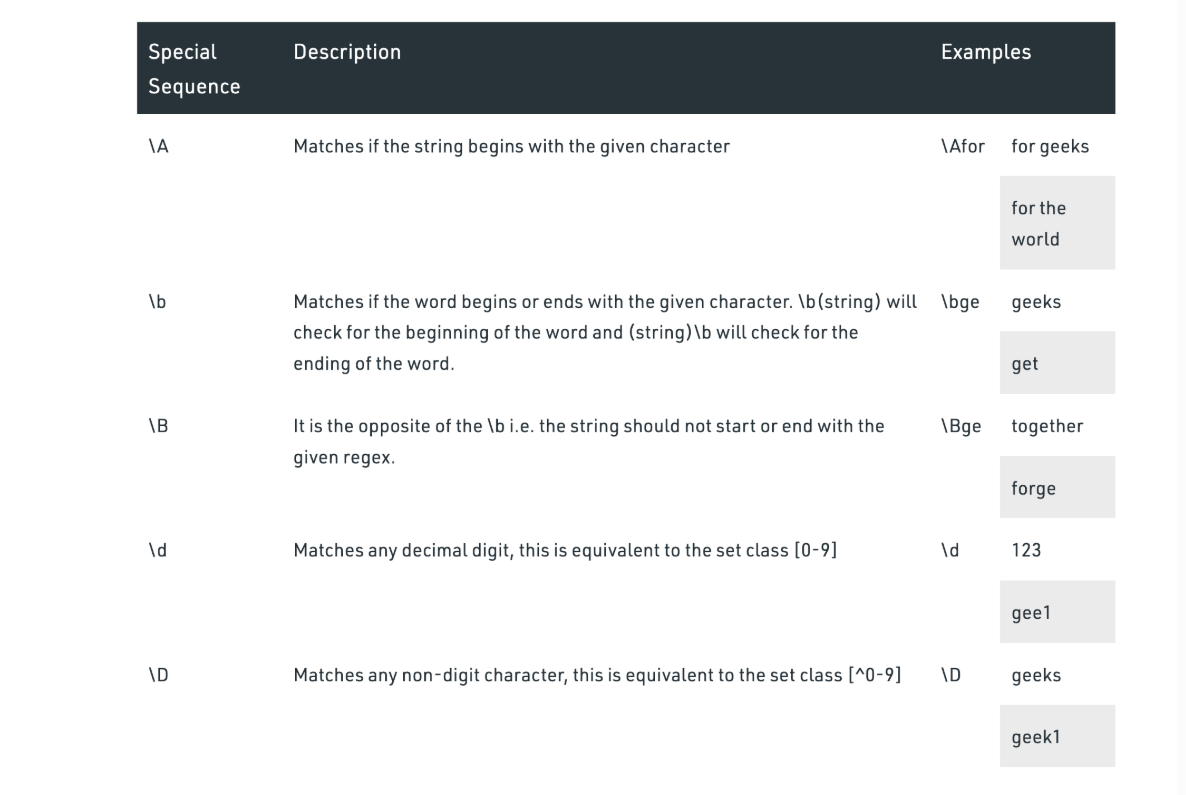

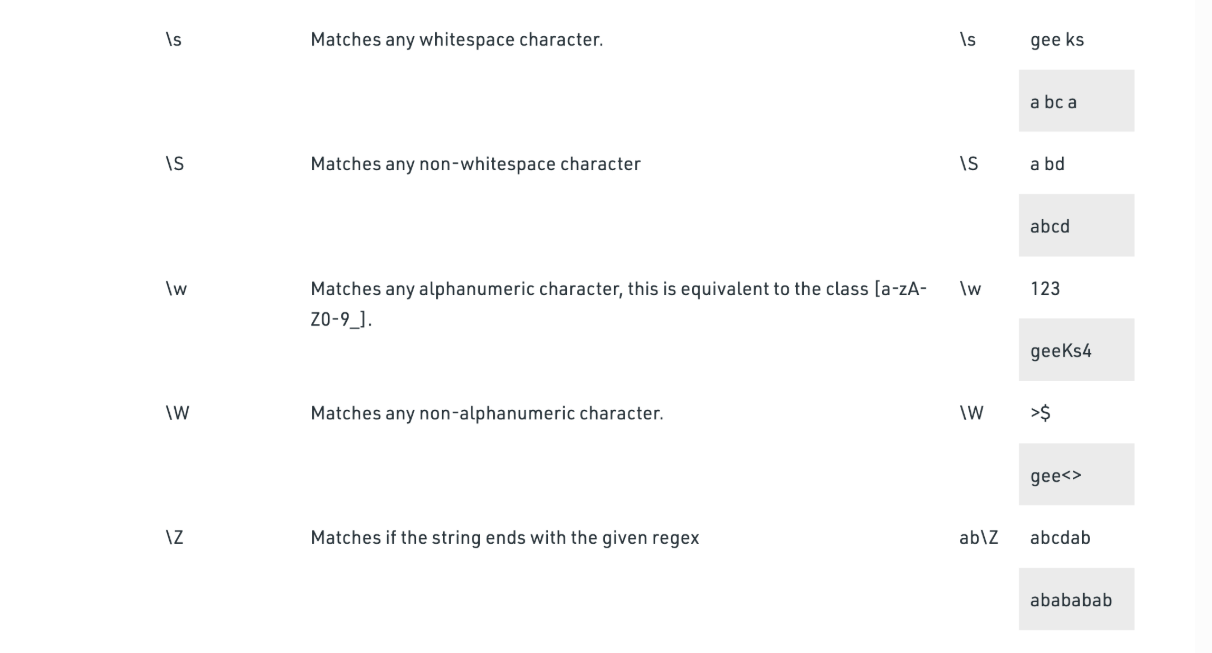

In [54]:
#\A — Matches BEGINNING of string

#Similar to ^ but stronger (works even in multiline mode).

print(bool(re.search(r"\Afor", "for geeks")))   # True
print(bool(re.search(r"\Afor", "for the world")))  # True
print(bool(re.search(r"\Afor", "geeks for geeks"))) # False

True
True
False


In [67]:
#\b — Word Boundary

#Matches beginning or end of a word.

#Useful for searching whole words.

#Pattern: \bge

#matches “ge” at start of a word

print((re.findall(r"\bge", "geeks get going")))
# ['ge', 'ge']


#Pattern: ge\b

#matches “ge” at the end of a word

print((re.findall(r"ge\b", "forge together")))
# ['ge', ]

['ge', 'ge']
['ge']


In [68]:
#\B — NOT a word boundary

#Opposite of \b

#Meaning:
#match only if NOT at start or end of a word.

re.findall(r"\Bge", "together forge")
# ['ge'] appears inside words, not at boundaries

['ge', 'ge']

In [69]:
#\d — Matches any digit

print(re.findall(r"\d", "123"))     # ['1','2','3']
print(re.findall(r"\d", "gee1"))    # ['1']

['1', '2', '3']
['1']


In [62]:
#\D — Matches NON-digits

#Opposite of \d.

print(re.findall(r"\D", "geeks"))   # ['g','e','e','k','s']
print(re.findall(r"\D", "geek1"))   # ['g','e','e','k']

['g', 'e', 'e', 'k', 's']
['g', 'e', 'e', 'k']


In [73]:
#\s — Matches ANY whitespace

#Whitespace includes:
#space " "
#tab \t
#newline \n

re.findall(r"\s", "gee    ks")     # [' ']
re.findall(r"\s", "a \n bc a")     # [' ', ' ']

[' ', '\n', ' ', ' ']

In [74]:
#\S — Matches NON-whitespace characters

#Opposite of \s.

re.findall(r"\S", "a bd")      # ['a','b','d']
re.findall(r"\S", "abcd")      # ['a','b','c','d']

['a', 'b', 'c', 'd']

In [76]:
#\w — Matches alphanumeric characters
# [a-zA-Z0-9_]
print(re.findall(r"\w", "123"))       # ['1','2','3']
print(re.findall(r"\w", "geeKs4"))    # ['g','e','e','K','s','4']

['1', '2', '3']
['g', 'e', 'e', 'K', 's', '4']


In [78]:
#\W — Matches NON-alphanumeric characters

#Opposite of \w.

print(re.findall(r"\W", ">$") )      # ['>','$']
re.findall(r"\W", "gee<>")    # ['<','>']

['>', '$']


['<', '>']

In [82]:
#\Z — Matches END of string

#Used to check if a string ends with a given pattern.

#✔ Example:

#Pattern: ab\Z → string must end with "ab"

print(bool(re.search(r"ab\Z", "abcdab") ) )  # match (ends with 'ab')
print(bool(re.search(r"ab\Z", "abababa")))  # match

True
True


#re Functions
##re.findall()

Searches the entire string

Finds all matches of the pattern

Returns them as a list of strings

Does NOT stop at the first match

Does NOT return match positions (use re.finditer() for that)

Searches left → right

In [93]:
# A Python program to demonstrate working of
# findall()

# A sample text string where regular expressionis searched.
string = """Hello my Number is 123456789 and
			my friend's number is 987654321"""

# A sample regular expression to find digits.
regex = r'\d+'

match = re.findall(regex, string)
print(match)

['123456789', '987654321']


#re.compile()
Regular expressions are compiled into pattern objects, which have methods for various operations such as searching for pattern matches or performing string substitutions.

Understanding the Output:

First occurrence is ‘e’ in “Aye” and not ‘A’, as it being Case Sensitive. Next Occurrence is ‘a’ in “said”, then ‘d’ in “said”, followed by ‘b’ and ‘e’ in “Gibenson”, the Last ‘a’ matches with “Stark”.

In [87]:
# Module Regular Expression is imported
# using __import__().
import re

# compile() creates regular expression
# character class [a-e],
# which is equivalent to [abcde].
# class [abcde] will match with string with
# 'a', 'b', 'c', 'd', 'e'.
p = re.compile('[a-e]')

# findall() searches for the Regular Expression
# and return a list upon finding
print(p.findall("Aye, said Mr. Gibenson Stark"))

['e', 'a', 'd', 'b', 'e', 'a']


In [92]:
# \d is equivalent to [0-9].
p = re.compile(r'\d')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))

# \d+ will match a group on [0-9], group
# of one or greater size
p = re.compile(r'\d+')
print(p.findall("I went to him at 11 A.M. on 4th July 1886"))

['1', '1', '4', '1', '8', '8', '6']
['11', '4', '1886']


In [94]:
# \w is equivalent to [a-zA-Z0-9_].
p = re.compile(r'\w')
print(p.findall("He said * in some_lang."))

# \w+ matches to group of alphanumeric character.
p = re.compile(r'\w+')
print(p.findall("I went to him at 11 A.M., he \
said *** in some_language."))

# \W matches to non alphanumeric characters.
p = re.compile(r'\W')
print(p.findall("he said *** in some_language."))


['H', 'e', 's', 'a', 'i', 'd', 'i', 'n', 's', 'o', 'm', 'e', '_', 'l', 'a', 'n', 'g']
['I', 'went', 'to', 'him', 'at', '11', 'A', 'M', 'he', 'said', 'in', 'some_language']
[' ', ' ', '*', '*', '*', ' ', ' ', '.']


In [97]:
# '*' replaces the no. of occurrence
# of a character.
p = re.compile(r'ab*')
print(p.findall("ababbaabbb"))

#Understanding the Output:

#Our RE is ab*, which ‘a’ accompanied by any no. of ‘b’s, starting from 0.
#Output ‘ab’, is valid because of single ‘a’ accompanied by single ‘b’.
#Output ‘abb’, is valid because of single ‘a’ accompanied by 2 ‘b’.
#Output ‘a’, is valid because of single ‘a’ accompanied by 0 ‘b’.
#Output ‘abbb’, is valid because of single ‘a’ accompanied by 3 ‘b’.

['ab', 'abb', 'a', 'abbb']


#re.split()
Split string by the occurrences of a character or a pattern, upon finding that pattern, the remaining characters from the string are returned as part of the resulting list.

Syntax :

re.split(pattern, string, maxsplit=0, flags=0)

The First parameter, pattern denotes the regular expression, string is the given string in which pattern will be searched for and in which splitting occurs, maxsplit if not provided is considered to be zero ‘0’, and if any nonzero value is provided, then at most that many splits occur. If maxsplit = 1, then the string will split once only, resulting in a list of length 2. The flags are very useful and can help to shorten code, they are not necessary parameters, eg: flags = re.IGNORECASE, in this split, the case, i.e. the lowercase or the uppercase will be ignored.

In [99]:
from re import split

# '\W+' denotes Non-Alphanumeric Characters
# or group of characters Upon finding ','
# or whitespace ' ', the split(), splits the
# string from that point
print(split(r'\W+', 'Words, words , Words'))
print(split(r'\W+', "Word's words Words"))

# Here ':', ' ' ,',' are not AlphaNumeric thus,
# the point where splitting occurs
print(split(r'\W+', 'On 12th Jan 2016, at 11:02 AM'))

# '\d+' denotes Numeric Characters or group of
# characters Splitting occurs at '12', '2016',
# '11', '02' only
print(split(r'\d+', 'On 12th Jan 2016, at 11:02 AM'))

['Words', 'words', 'Words']
['Word', 's', 'words', 'Words']
['On', '12th', 'Jan', '2016', 'at', '11', '02', 'AM']
['On ', 'th Jan ', ', at ', ':', ' AM']


#Homework:
re.sub()

re.subn()

re.escape()

re.search()

#re.search()

re.search(pattern, string):

Scans the entire string

Returns the first match object

Stops after finding the first occurrence

Returns None if no match is found

In [3]:
import re

result = re.search(r"cat", "The cat is cute")
print(result)

<re.Match object; span=(4, 7), match='cat'>


#re.sub() – SUBSTITUTE (replace text using regex)

What it does:

Searches for the pattern in a string and replaces all occurrences with a replacement string.

##When to use re.sub()?

Clean text

Mask IDs or phone numbers

Remove unwanted characters

Replace multiple spaces

Format dates/strings

In [4]:
# Syntax - re.sub(pattern, replace_with, text)

text = "My number is 123-456."
result = re.sub(r"\d", "#", text)
print(result)

My number is ###-###.


#re.subn() – SUBSTITUTE + COUNT

Same as re.sub() but also tells how many replacements were made.

Syntax - re.subn(pattern, replace_with, text)

##When to use re.subn()?

When you also need the count

For logging how many changes were made

Cleaning datasets where you want "how many cleaned?"

In [5]:
text = "aa bb cc aa"
result = re.subn(r"aa", "XX", text)
print(result)

('XX bb cc XX', 2)


#re.escape() – Escape special regex characters

Regex treats characters like . ^ $ * + ? { } ( ) | [ ] \ as special operators.

re.escape() converts any string into a literal-safe regex string.

##When to use re.escape()?

When user input goes into regex (avoid errors or injection)

When searching text that contains regex symbols

When matching file names, URLs, or paths

When constructing safe dynamic regex patterns

In [6]:
text = "price is 100$ (special offer)"
escaped = re.escape(text)
print(escaped)

price\ is\ 100\$\ \(special\ offer\)
